# Histogramas de densidades en el halo de materia oscuro

Importar librerias

```{notebook}

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm 
import numpy as np

 Funcion para graficar  la densidad de las posiciones de los halos individuales  </p>



In [25]:
def cartessian_projection(pos, figname):
   fig, ax = plt.subplots(1, 3, figsize=(15,5), sharex=True)
   ax[0].hist2d(pos['x[kpc]'], pos['y[kpc]'],  bins=np.linspace(-150,150,150), norm=LogNorm())
   ax[0].set_xlabel(r"x[$kpc$]") 
   ax[0].set_ylabel(r"y[$kpc$]") 
   ax[0].title.set_text("Proyección en xy")
   # ax[0].title.set_fontsize(15)
   
   ax[1].hist2d(pos['y[kpc]'], pos['z[kpc]'],  bins=np.linspace(-150,150,150), norm=LogNorm())
   ax[1].set_xlabel(r"y[$kpc$]") 
   ax[1].set_ylabel(r"z[$kpc$]") 
   ax[1].title.set_text("Proyección en yz")
   ax[2].hist2d(pos['x[kpc]'], pos['z[kpc]'],  bins=np.linspace(-150,150,150), norm=LogNorm())
   ax[2].set_xlabel(r"x[$kpc$]") 
   ax[2].set_ylabel(r"z[$kpc$]") 
   ax[2].title.set_text("Proyección en xz")
   im_xy = ax[0].imshow(pos, vmin=-0.2, vmax=0.2)
   im_yz = ax[1].imshow(pos, vmin=-0.2, vmax=0.2)
   im_xz = ax[2].imshow(pos, vmin=-0.2, vmax=0.2)
   # im0 = ax[0].imshow(np.log10(np.abs(pos['x[kpc]'])), cmap='plasma')

   fig.subplots_adjust(wspace=0.3)
   # plt.tight_layout()
   fig.suptitle("Histograma de posiciones "+figname, fontsize=20)
   # plt.colorbar(im0, ax=ax[0])
   plt.savefig('./../media/imgs/cartessian_projection/'+figname +'.jpg', bbox_inches='tight', dpi = 150)
   
   plt.colorbar(im_xy, ax=ax[0])
   plt.colorbar(im_yz, ax=ax[1])
   plt.colorbar(im_xz, ax=ax[2])
   plt.show()
   plt.close()
   return 0

def cartessian_projection_zoom(pos, figname):
   fig, ax = plt.subplots(1, 1, figsize=(5,5))
   ax.hist2d(pos[0], pos[1],  bins=np.linspace(-150,150,150), norm=LogNorm())
   # ax.title.set_text("Proyección en"+ figname)
   im = ax.imshow( pos, vmin=-0.2, vmax=0.2)
   fig.suptitle("Histograma de posiciones "+figname, fontsize=15)
   plt.xlim(-10,10)
   plt.ylim(-10,10)
   plt.colorbar(im, ax=ax)
   plt.savefig('./../media/imgs/cartessian_projection_zoom/'+figname +'.jpg', bbox_inches='tight', dpi = 150)
   plt.show()
   plt.close()
   



## Lectura de datos

In [6]:
reference = pd.read_csv('../data/rand_mwb1_110.txt', names=["x[kpc]","y[kpc]","z[kpc]","vx[km/s]","vy[km/s]","vz[km/s]"], sep=" ")
perturbed = pd.read_csv('../data/rand_mwlmc5b0_110.txt', names=["x[kpc]","y[kpc]","z[kpc]","vx[km/s]","vy[km/s]","vz[km/s]"], sep=" ")

df_mw = pd.DataFrame(reference)
df_mw_lmc = pd.DataFrame(perturbed)


<p> Uso de la funcion 'cartesian_projection' para graficar </p>


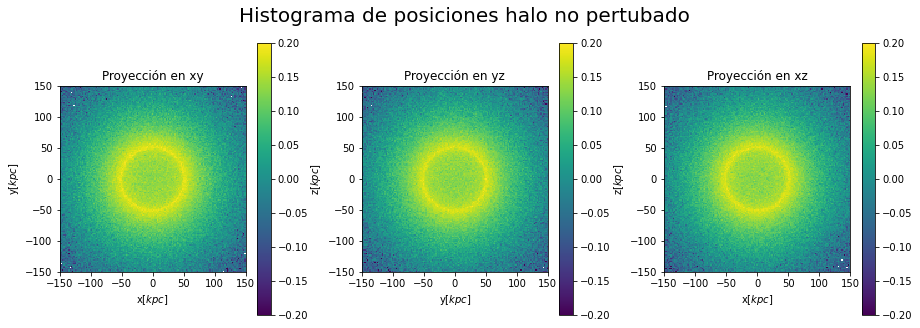

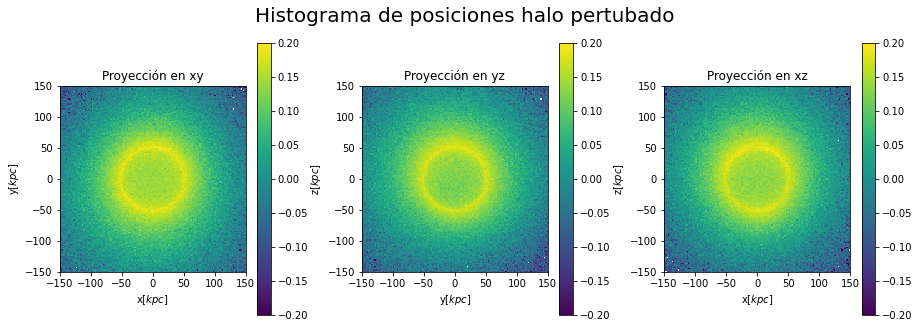

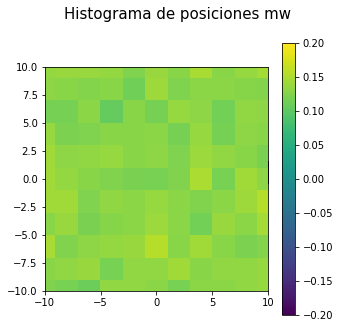

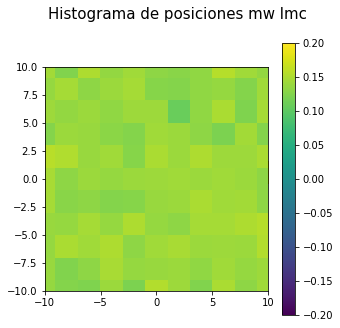

In [26]:
cartessian_projection(df_mw, "halo no pertubado")
cartessian_projection(df_mw_lmc, "halo pertubado")


pos_xy_mw = np.array([df_mw['x[kpc]'], df_mw['y[kpc]']])
pos_xy_mw_lmc = np.array([df_mw_lmc['x[kpc]'], df_mw_lmc['y[kpc]']])



cartessian_projection_zoom(pos_xy_mw, "mw ")
cartessian_projection_zoom(pos_xy_mw_lmc, "mw lmc ")

<p> Calculo de los histogramas haciendo uso de la funcion 'histogram2d' de la libreria Numpy </p>

In [28]:


density_xy_1 = np.histogram2d(df_mw['x[kpc]'], df_mw['y[kpc]'],   bins=np.linspace(-150,150,150) )

# for i in density1[0].tolist():
    # print(i,'\n')

# print(type(density1[0].tolist()))

density_xy_2 = np.histogram2d(df_mw_lmc['x[kpc]'], df_mw_lmc['y[kpc]'],  bins=np.linspace(-150,150,150))



density_yz_1 = np.histogram2d(df_mw['y[kpc]'], df_mw['z[kpc]'], bins=np.linspace(-150,150,150))

density_yz_2 = np.histogram2d(df_mw_lmc['y[kpc]'], df_mw_lmc['z[kpc]'], bins=np.linspace(-150,150,150))

density_xz_1 = np.histogram2d(df_mw['x[kpc]'], df_mw['z[kpc]'], bins=np.linspace(-150,150,150))

density_xz_2 = np.histogram2d(df_mw_lmc['x[kpc]'], df_mw_lmc['z[kpc]'], bins=np.linspace(-150,150,150))


<p>Division de las primeras columnas de cada matriz densidad. </p>

C:\Users\Stephanie Cely\AppData\Local\Temp\ipykernel_2956\3174099935.py:26: RuntimeWarning: divide by zero encountered in true_divide
  division_xy = (nparticles_xy_2/nparticles_xy_1)-1
C:\Users\Stephanie Cely\AppData\Local\Temp\ipykernel_2956\3174099935.py:30: RuntimeWarning: divide by zero encountered in true_divide
  division_yz = (nparticles_yz_2/nparticles_yz_1)-1
C:\Users\Stephanie Cely\AppData\Local\Temp\ipykernel_2956\3174099935.py:34: RuntimeWarning: divide by zero encountered in true_divide
  division_xz = (nparticles_xz_2/nparticles_xz_1)-1
C:\Users\Stephanie Cely\AppData\Local\Temp\ipykernel_2956\3174099935.py:34: RuntimeWarning: invalid value encountered in true_divide
  division_xz = (nparticles_xz_2/nparticles_xz_1)-1


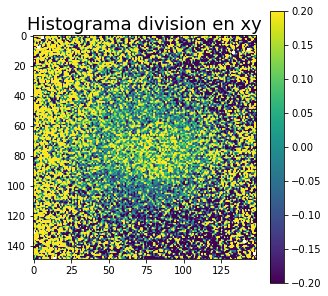

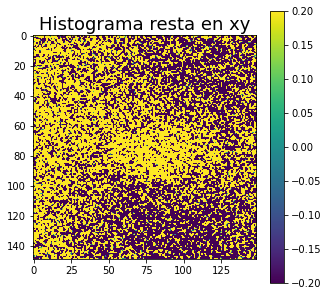

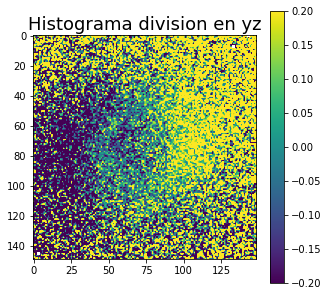

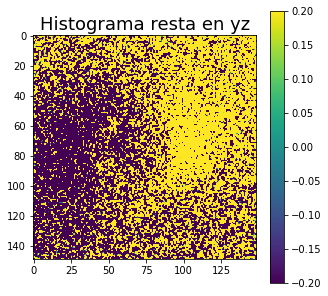

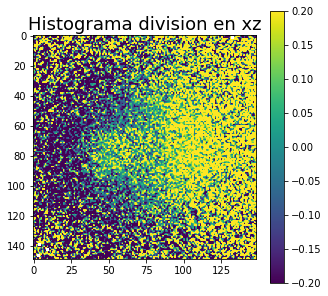

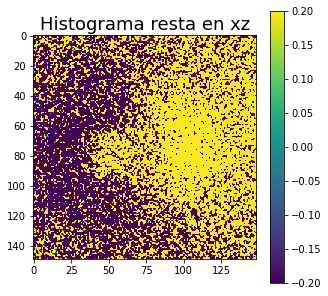

0

In [33]:
nparticles_xy_1 = density_xy_1[0]
nparticles_xy_2 = density_xy_2[0]
nparticles_yz_1 = density_yz_1[0]
nparticles_yz_2 = density_yz_2[0]
nparticles_xz_1 = density_xz_1[0]
nparticles_xz_2 = density_xz_2[0]


def cartessian_projection4 (density, figname ):
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    im = ax.imshow(density, vmin = -0.2, vmax=0.2)
    plt.colorbar(im) 
    plt.title("Histograma "+figname, fontsize=18)
    plt.savefig('./../media/imgs/'+figname +'.jpg', bbox_inches='tight', dpi = 150)
    plt.show()
    plt.close()
    return 0


# Opcion para solucionar el problema de division por cero
# division = np.divide(nparticles2,nparticles-1)


# Comparacion de densidad de particulas
# Componenentes xy
division_xy = (nparticles_xy_2/nparticles_xy_1)-1
resta_xy = nparticles_xy_2-nparticles_xy_1

# Componentes yz
division_yz = (nparticles_yz_2/nparticles_yz_1)-1
resta_yz = nparticles_yz_2-nparticles_yz_1

# Componentes xz
division_xz = (nparticles_xz_2/nparticles_xz_1)-1
resta_xz = nparticles_xz_2-nparticles_xz_1






cartessian_projection4(division_xy, "division en xy")
cartessian_projection4(resta_xy, "resta en xy")
cartessian_projection4(division_yz, "division en yz")
cartessian_projection4(resta_yz, "resta en yz")
cartessian_projection4(division_xz, "division en xz")
cartessian_projection4(resta_xz, "resta en xz")




## Calculo componentes momento angular $$\vec{L}= \vec{r} \times \vec{v}$$


Importar data de las columnas de velocidad en un ndarray


In [43]:
position1 = np.array([df['x[kpc]'], df['y[kpc]'], df['z[kpc]']])
velocity1 = np.array([df['vx[km/s]'], df['vy[km/s]'], df['vz[km/s]']])
position2 = np.array([df2['x[kpc]'], df2['y[kpc]'], df2['z[kpc]']])
velocity2 = np.array([df2['vx[km/s]'], df2['vy[km/s]'], df2['vz[km/s]']])


print(position1.size, velocity1.size)
position1.shape = (position1.size//3, 3)
velocity1.shape = (velocity1.size//3, 3)
position2.shape = (position2.size//3, 3)
velocity2.shape = (velocity2.size//3, 3)



def angular_momentum(pos, vel):
    L = np.cross(pos, vel)
    return L[:,0], L[:,1], L[:,2]
Lx1, Ly1, Lz1 = angular_momentum(position1, velocity1)
Lx2, Ly2, Lz2 = angular_momentum(position2, velocity2)
print("Lx1", Lx1.shape, Lx1)

def total_angular_momentum(Lx, Ly, Lz):
    return np.sum(Lx), np.sum(Ly), np.sum(Lz)




472887 472887
Lx1 (157629,) [  2514.44955543   1828.02688931   2553.00666957 ...   3163.69234908
 -13151.96642739             nan]
